In [1]:
import pandas

In [2]:
# Read input (sheet 1) to a DataFrame
event = pandas.read_excel('python-in-a-nutshell-data/Q1-18-python-in-a-nutshell.xlsx', index_col='Description')
event

,Content
Description,
Date,2018-01-31 00:00:00
Start,08:00:00
End,19:00:00
Email,foo@example.com
Organisator,John Doe
Place,Berlin
Type,Development
Name,Python in a Nutshell


In [3]:
# Transform
event = event.transpose()
event

Description,Date,Start,End,Email,Organisator,Place,Type,Name
Content,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell


In [4]:
# Correlation ID for upcoming steps
event.insert(0, 'Id', 'Q1-18')
event

Description,Id,Date,Start,End,Email,Organisator,Place,Type,Name
Content,Q1-18,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell


In [5]:
# React input (sheet 2)
expenses = pandas.read_excel('python-in-a-nutshell-data/Q1-18-python-in-a-nutshell.xlsx', sheet_name='Expenses')
# Correlation ID for upcoming steps
expenses.insert(0, 'Id', 'Q1-18')
expenses

,Id,Subject,Units,Estimate,Actual,Category
0,Q1-18,Room,1,800,NaN,Site
1,Q1-18,Speakers,2,300,NaN,Program
2,Q1-18,Equipment,1,190,NaN,Site
3,Q1-18,Food,60,15,NaN,Refreshment
4,Q1-18,Hotel,2,70,NaN,Program
5,Q1-18,Drings,60,5,NaN,Refreshment
6,Q1-18,Google,1,200,NaN,Marketing


In [6]:
# Merge to two DataFrames together
expenses = expenses.merge(event, on='Id')
expenses

,Id,Subject,Units,Estimate,Actual,Category,Date,Start,End,Email,Organisator,Place,Type,Name
0,Q1-18,Room,1,800,NaN,Site,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
1,Q1-18,Speakers,2,300,NaN,Program,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
2,Q1-18,Equipment,1,190,NaN,Site,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
3,Q1-18,Food,60,15,NaN,Refreshment,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
4,Q1-18,Hotel,2,70,NaN,Program,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
5,Q1-18,Drings,60,5,NaN,Refreshment,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
6,Q1-18,Google,1,200,NaN,Marketing,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell


In [7]:
# Cleanup NaN Columns
expenses = expenses.dropna(axis=1)
expenses

,Id,Subject,Units,Estimate,Category,Date,Start,End,Email,Organisator,Place,Type,Name
0,Q1-18,Room,1,800,Site,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
1,Q1-18,Speakers,2,300,Program,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
2,Q1-18,Equipment,1,190,Site,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
3,Q1-18,Food,60,15,Refreshment,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
4,Q1-18,Hotel,2,70,Program,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
5,Q1-18,Drings,60,5,Refreshment,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell
6,Q1-18,Google,1,200,Marketing,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell


In [8]:
# Aggreagte (sum) to columns
expenses = expenses.assign(Total = lambda x: x.Units * x.Estimate)
expenses

,Id,Subject,Units,Estimate,Category,Date,Start,End,Email,Organisator,Place,Type,Name,Total
0,Q1-18,Room,1,800,Site,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,800
1,Q1-18,Speakers,2,300,Program,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,600
2,Q1-18,Equipment,1,190,Site,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,190
3,Q1-18,Food,60,15,Refreshment,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,900
4,Q1-18,Hotel,2,70,Program,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,140
5,Q1-18,Drings,60,5,Refreshment,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,300
6,Q1-18,Google,1,200,Marketing,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,200


In [9]:
# GroupBy and Aggregate (sum)
groupby = expenses.groupby(['Category']).agg({'Total': [sum, min, max]})
groupby

Total          
              sum  min  max
Category                   
Marketing     200  200  200
Program       740  140  600
Refreshment  1200  300  900
Site          990  190  800

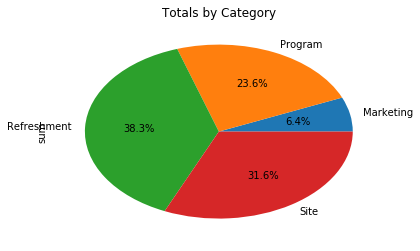

In [11]:
# Plot
groupby['Total']['sum'].plot(kind='pie', title='Totals by Category', autopct='%1.1f%%')

In [12]:
# More Files
from glob import glob
all_event_files = glob('python-in-a-nutshell-data/*.xlsx')
all_event_files

['python-in-a-nutshell-data/q1-18-python-in-a-nutshell.xlsx',
 'python-in-a-nutshell-data/q2-18-python-in-a-nutshell.xlsx',
 'python-in-a-nutshell-data/q4-17-python-in-a-nutshell.xlsx']

In [13]:
# Transform to sequence of DataFrames using comprehension
expenses_dfs = [pandas.read_excel(f, sheet_name='Expenses') for f in all_event_files]
expenses_dfs

[     Subject  Units  Estimate  Actual     Category
 0       Room      1       800     NaN         Site
 1   Speakers      2       300     NaN      Program
 2  Equipment      1       190     NaN         Site
 3       Food     60        15     NaN  Refreshment
 4      Hotel      2        70     NaN      Program
 5     Drings     60         5     NaN  Refreshment
 6     Google      1       200     NaN    Marketing,
      Subject  Units  Estimate  Actual     Category
 0       Room      1      1200     NaN         Site
 1   Speakers      3       350     NaN      Program
 2  Equipment      1       290     NaN         Site
 3       Food    100        20     NaN  Refreshment
 4      Hotel      3       120     NaN      Program
 5     Drings    100         6     NaN  Refreshment
 6     Google      1       200     NaN    Marketing,
      Subject  Units  Estimate  Actual     Category
 0       Room      1       150     NaN         Site
 1   Speakers      3        50     NaN      Program
 2  Equipm

In [14]:
expenses_df = pandas.concat(expenses_dfs, ignore_index=True)
expenses_df

,Subject,Units,Estimate,Actual,Category
0,Room,1,800,NaN,Site
1,Speakers,2,300,NaN,Program
2,Equipment,1,190,NaN,Site
3,Food,60,15,NaN,Refreshment
4,Hotel,2,70,NaN,Program
5,Drings,60,5,NaN,Refreshment
6,Google,1,200,NaN,Marketing
7,Room,1,1200,NaN,Site
8,Speakers,3,350,NaN,Program
9,Equipment,1,290,NaN,Site


In [15]:
# All steps as function
def sheets_as_dataframes(f):
    event = pandas.read_excel(f, index_col='Description').transpose()
    id = event['Date']['Content'].strftime('%d-%m-%y')
    event.insert(0, 'Id', id)
    expenses = pandas.read_excel(f, sheet_name='Expenses')
    expenses.insert(0, 'Id', id)
    expenses = expenses.merge(event, on='Id').dropna(axis=1)
    expenses = expenses.assign(Total = lambda x: x.Units * x.Estimate)

    return expenses

# Concat all DataFrames
all = pandas.concat(sheets_as_dataframes(f) for f in all_event_files)
all

,Id,Subject,Units,Estimate,Category,Date,Start,End,Email,Organisator,Place,Type,Name,Total
0,31-01-18,Room,1,800,Site,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,800
1,31-01-18,Speakers,2,300,Program,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,600
2,31-01-18,Equipment,1,190,Site,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,190
3,31-01-18,Food,60,15,Refreshment,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,900
4,31-01-18,Hotel,2,70,Program,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,140
5,31-01-18,Drings,60,5,Refreshment,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,300
6,31-01-18,Google,1,200,Marketing,2018-01-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Berlin,Development,Python in a Nutshell,200
0,31-03-18,Room,1,1200,Site,2018-03-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Munich,Development,Python in a Nutshell,1200
1,31-03-18,Speakers,3,350,Program,2018-03-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Munich,Development,Python in a Nutshell,1050
2,31-03-18,Equipment,1,290,Site,2018-03-31 00:00:00,08:00:00,19:00:00,foo@example.com,John Doe,Munich,Development,Python in a Nutshell,290


In [16]:
# GroupBy and Aggregate (sum)
all_grouped = all.groupby(['Place', 'Category']).agg({'Total': sum})
all_grouped

Total
Place   Category          
Berlin  Marketing      200
        Program        740
        Refreshment   1200
        Site           990
Hamburg Marketing      200
        Program        150
        Refreshment    450
        Site           250
Munich  Marketing      200
        Program       1410
        Refreshment   2600
        Site          1490

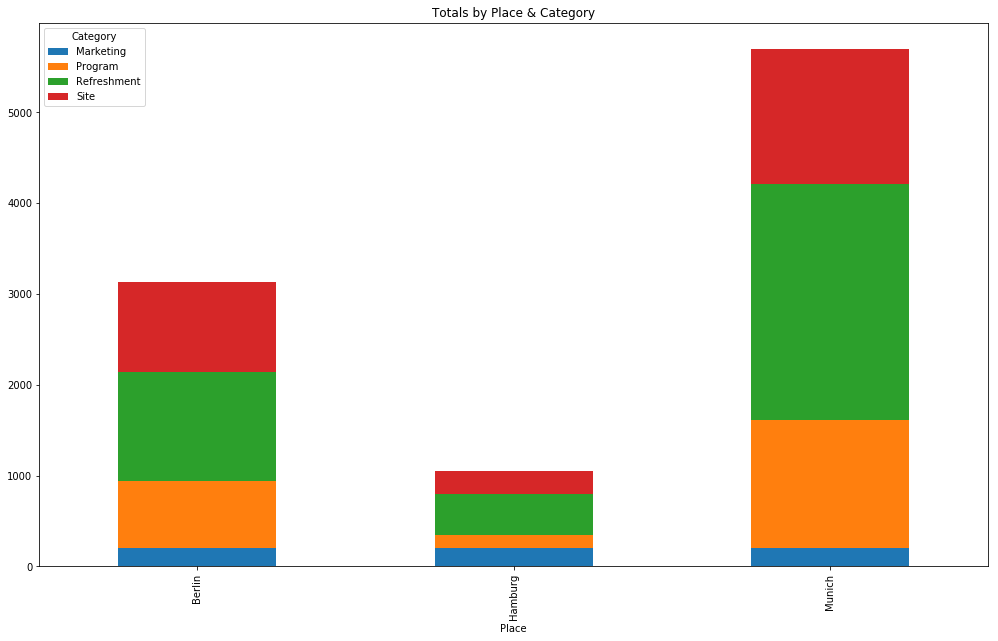

In [18]:
# Reduce hierarchical level and Plot
all_grouped['Total'].unstack('Category').plot(kind='bar', title='Totals by Place & Category', stacked=True, figsize=(17,10))